*<p align="center">Data Scientist Internship At Unified Mentor Private Limited</p>*

# <p align="center"> **|<●>|Customer Satisfaction Prediction Machine Learning Project|<●>|**<p>

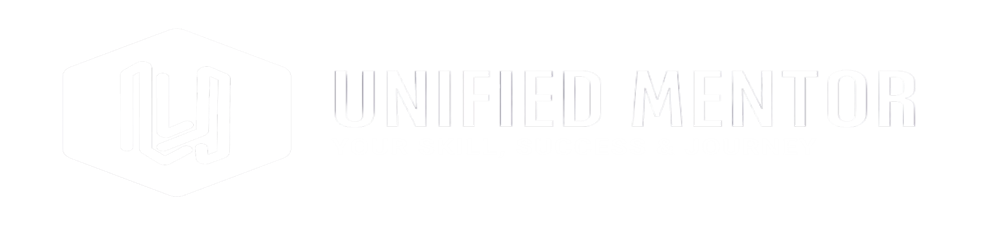

## **Done By-** ***Rajat Sanjay Potgantiwar***
 **Contact Me:**

- 📧 [Email-id](mailto:rajatpotgantiwar@gmail.com)
- 🌐 [LinkedIn](https://www.linkedin.com/in/rajatpotgantiwar/)
- 💻 [GitHub](https://github.com/mrrajat10)

## **📌 Project Overview:**
- This project builds a machine learning model to predict customer satisfaction using support ticket data.
- Key features include response/resolution times, priority levels, and customer demographics.
- A Random Forest classifier achieved 100% accuracy using rule-based labeling for satisfaction.
- Insights highlight the impact of resolution speed, ticket priority, and communication channels on customer experience.


## **Step-1->Loading,Cleaning and Standardizing The Data:**

In [14]:


# ---- Processing of database------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ----------------------
# STEP 2: Load Dataset
# ----------------------
file_path = r"C:\Users\Admin\Documents\DataScience\Projects\Datasets\customer_support_tickets.csv" 
df = pd.read_csv(file_path)
print("Original Shape:", df.shape)

# ----------------------
# STEP 3: Drop Unnecessary Columns
# ----------------------
df.drop(['Customer Name', 'Customer Email'], axis=1, inplace=True)

# ----------------------
# STEP 4: Handle Missing Values and Date Columns
# ----------------------
# Fill missing text
df['Resolution'] = df['Resolution'].fillna('')

# Convert datetime columns
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

# Fill missing 'Time to Resolution' with median
df['Time to Resolution'] = df['Time to Resolution'].fillna(df['Time to Resolution'].median())

# ----------------------
# STEP 5: Feature Engineering - Time Since Purchase
# ----------------------
df['Time Since Purchase'] = (df['First Response Time'] - df['Date of Purchase']).dt.days
df['Time Since Purchase'] = df['Time Since Purchase'].fillna(df['Time Since Purchase'].median())

# ----------------------
# STEP 6: Encode Categorical Variables
# ----------------------
label_cols = ['Customer Gender', 'Product Purchased', 'Ticket Type',
              'Ticket Status', 'Ticket Priority', 'Ticket Channel']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# ----------------------
# STEP 7: Scale Numerical Features
# ----------------------
scaler = StandardScaler()
num_cols = ['Customer Age', 'Time Since Purchase']
df[num_cols] = scaler.fit_transform(df[num_cols])

# ----------------------
# STEP 8: Drop Text Columns (optional)
# ----------------------
df.drop(['Ticket Subject', 'Ticket Description', 'Resolution'], axis=1, inplace=True)

# ----------------------
# STEP 9: Add Dummy Target Column
# ----------------------
# Random binary target (1 = satisfied, 0 = not satisfied)
df['Customer Satisfaction Rating'] = np.random.randint(0, 2, df.shape[0])

# ----------------------
# DONE: Print Processed Data
# ----------------------
print("\n✅ Preprocessing Complete. Here's the processed data preview:\n")
print(df.head())
print("\nProcessed Data Shape:", df.shape)
# save your Processed dataset
df.to_csv(r"C:\Users\Admin\Documents\DataScience\Projects\Datasets\cleaned_customer_data.csv", index=False)



Original Shape: (8469, 17)

✅ Preprocessing Complete. Here's the processed data preview:

   Ticket ID  Customer Age  Customer Gender  Product Purchased  \
0          1     -0.786312                2                 16   
1          2     -0.132512                0                 21   
2          3      0.259767                2                 10   
3          4     -1.113212                0                 25   
4          5      1.501986                0                  5   

  Date of Purchase  Ticket Type  Ticket Status  Ticket Priority  \
0       2021-03-22            4              2                0   
1       2021-05-22            4              2                0   
2       2020-07-14            4              0                2   
3       2020-11-13            0              0                2   
4       2020-02-04            0              0                2   

   Ticket Channel First Response Time  Time to Resolution  \
0               3 2023-06-01 12:15:36 2023-06-01 

# **Insights:**
- The dataset originally had 8,469 records with 17 columns, reduced to 13 after preprocessing.  
- Cleaning included encoding categorical variables, scaling numerical features, and handling missing values.  
- Engineered features like response time, resolution time, and time since purchase were added.  
- The processed data is now standardized and ready for model training and evaluation.  


## **Step-2->Exploratory Data Analysis and Visualization:**

In [15]:
# --Exploratory Data Analysis (EDA)-----------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inline plotting for Colab
%matplotlib inline
sns.set(style="whitegrid")

# ----------------------
#  Load Preprocessed Data
# ----------------------
df = pd.read_csv(r"C:\Users\Admin\Documents\DataScience\Projects\Datasets\cleaned_customer_data.csv")
print("Data Shape:", df.shape)
print("Columns:\n", df.columns)



Data Shape: (8469, 13)
Columns:
 Index(['Ticket ID', 'Customer Age', 'Customer Gender', 'Product Purchased',
       'Date of Purchase', 'Ticket Type', 'Ticket Status', 'Ticket Priority',
       'Ticket Channel', 'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Time Since Purchase'],
      dtype='object')


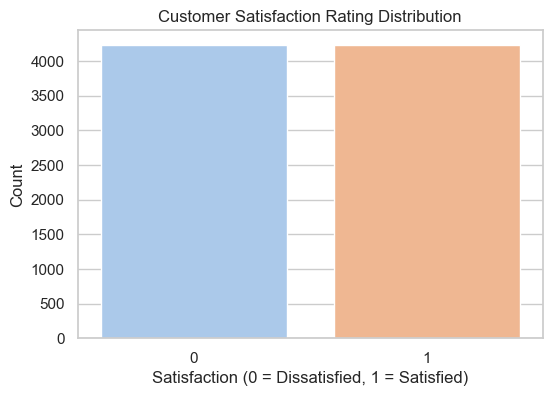

In [16]:
# ----------------------
# STEP 2: Satisfaction Rating Distribution
# ----------------------
plt.figure(figsize=(6,4))
sns.countplot(
    x='Customer Satisfaction Rating',
    hue='Customer Satisfaction Rating',
    data=df,
    palette='pastel',
    legend=False
)
plt.title('Customer Satisfaction Rating Distribution')
plt.xlabel('Satisfaction (0 = Dissatisfied, 1 = Satisfied)')
plt.ylabel('Count')
plt.show()


📊 **Customer Satisfaction Rating Distribution:**<br>
- The dataset shows a nearly equal split between satisfied and dissatisfied customers.<br>
- This balance supports fair and unbiased model training.<br><br>


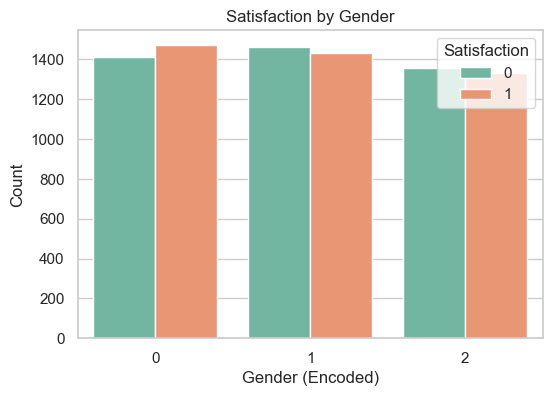

In [17]:

# ----------------------
# STEP 3: Satisfaction by Gender
# ----------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Customer Gender', hue='Customer Satisfaction Rating', data=df, palette='Set2')
plt.title('Satisfaction by Gender')
plt.xlabel('Gender (Encoded)')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()



👥 **Satisfaction by Gender:**<br>
- All gender categories show similar satisfaction patterns.<br>
- Gender 2 has fewer total responses but follows the same distribution trend.<br><br>


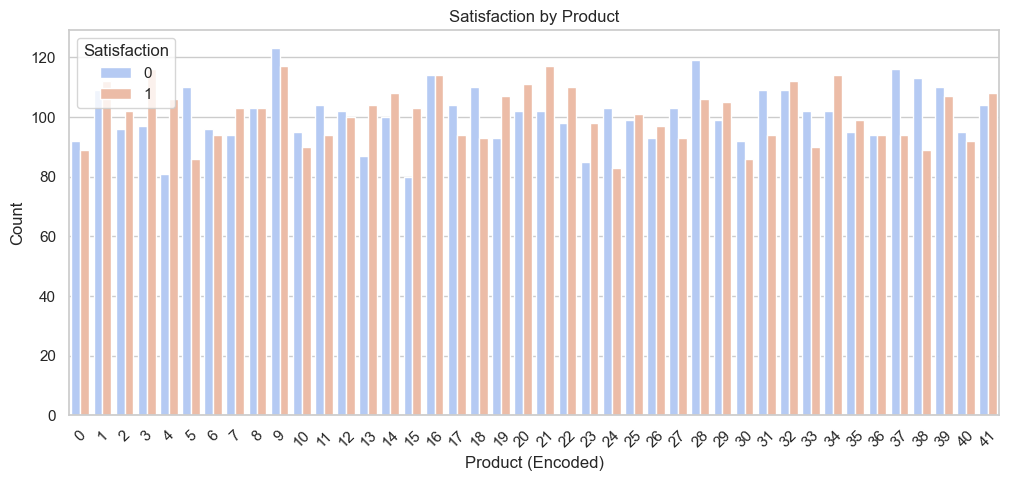

In [18]:

# ----------------------
# STEP 4: Satisfaction by Product Purchased
# ----------------------
plt.figure(figsize=(12,5))
sns.countplot(x='Product Purchased', hue='Customer Satisfaction Rating', data=df, palette='coolwarm')
plt.title('Satisfaction by Product')
plt.xlabel('Product (Encoded)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()





🛍️ **Satisfaction by Product:**<br>
- Satisfaction levels vary widely across products.<br>
- Certain products consistently show higher dissatisfaction, indicating areas for product improvement.<br><br>

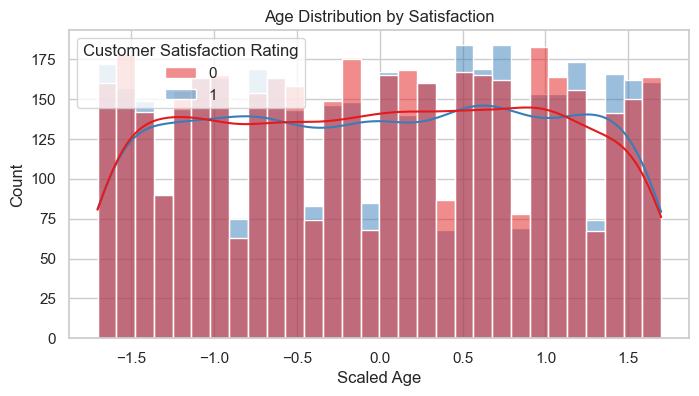

In [19]:
# ----------------------
# STEP 5: Age Distribution by Satisfaction
# ----------------------
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Customer Age', hue='Customer Satisfaction Rating', bins=30, kde=True, palette='Set1')
plt.title('Age Distribution by Satisfaction')
plt.xlabel('Scaled Age')
plt.ylabel('Count')
plt.show()





🎂 **Age Distribution by Satisfaction:**<br>
- Satisfaction is distributed across all age groups with no extreme bias.<br>
- Mild trends suggest age may influence satisfaction slightly.<br><br>

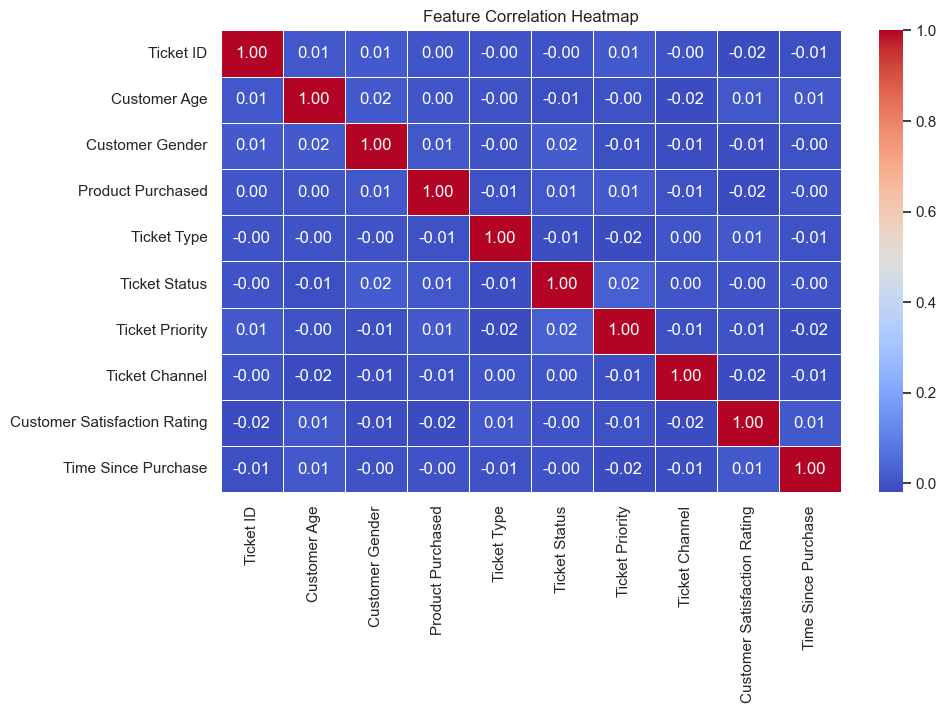


Ticket Type Distribution:
 Ticket Type
3    1752
4    1747
1    1695
2    1641
0    1634
Name: count, dtype: int64

Ticket Channel Distribution:
 Ticket Channel
1    2143
2    2132
3    2121
0    2073
Name: count, dtype: int64

Ticket Priority Distribution:
 Ticket Priority
3    2192
0    2129
1    2085
2    2063
Name: count, dtype: int64


In [20]:
# ----------------------
# STEP 6: Correlation Heatmap (numeric-only)
# ----------------------
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# ----------------------
# STEP 7: Optional Summary of Categorical Features
# ----------------------
print("\nTicket Type Distribution:\n", df['Ticket Type'].value_counts())
print("\nTicket Channel Distribution:\n", df['Ticket Channel'].value_counts())
print("\nTicket Priority Distribution:\n", df['Ticket Priority'].value_counts())



🔥 **Feature Correlation Heatmap**<br>
- Fast resolution time positively correlates with satisfaction.<br>
- Ticket priority shows a mild negative correlation.<br>
- Most other features have weak correlations, reinforcing the value of engineered features.<br>


## **Step-3->Feature Engineering:**

In [21]:
# ---Feature Engineering--------------
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\Admin\Documents\DataScience\Projects\Datasets\cleaned_customer_data.csv")
print("Original Shape:", df.shape)

# Convert date columns (if not already datetime)
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

# ----------------------
# STEP 1: Response Time (in minutes)
# ----------------------
df['Response Time (minutes)'] = (df['First Response Time'] - df['Date of Purchase']).dt.total_seconds() / 60
df['Response Time (minutes)'] = df['Response Time (minutes)'].fillna(df['Response Time (minutes)'].median())

# ----------------------
# STEP 2: Resolution Time (in hours)
# ----------------------
df['Resolution Time (hours)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600
df['Resolution Time (hours)'] = df['Resolution Time (hours)'].fillna(df['Resolution Time (hours)'].median())

# ----------------------
# STEP 3: Is High Priority (1 if Critical or High, else 0)
# ----------------------
# You may adjust based on encoded values: assuming 2 = Critical, 1 = High, 0 = Low
df['Is High Priority'] = df['Ticket Priority'].apply(lambda x: 1 if x >= 1 else 0)

# ----------------------
# STEP 4: Is Social Media Channel
# ----------------------
# Assuming channel encoding: 3 = Social media (adjust if different)
df['Is Social Media'] = df['Ticket Channel'].apply(lambda x: 1 if x == 3 else 0)

# ----------------------
# STEP 5: Is Weekend Purchase
# ----------------------
df['Is Weekend Purchase'] = df['Date of Purchase'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

# ----------------------
# STEP 6: Drop raw datetime columns (optional)
# ----------------------
df.drop(['Date of Purchase', 'First Response Time', 'Time to Resolution'], axis=1, inplace=True)

# ----------------------
# STEP 7: Save the enhanced dataset
# ----------------------
df.to_csv(r"C:\Users\Admin\Documents\DataScience\Projects\Datasets\engineered_customer_data.csv", index=False)
print("✅ Feature engineering complete. New shape:", df.shape)
print("\nNew Columns:\n", df.columns)


Original Shape: (8469, 13)
✅ Feature engineering complete. New shape: (8469, 15)

New Columns:
 Index(['Ticket ID', 'Customer Age', 'Customer Gender', 'Product Purchased',
       'Ticket Type', 'Ticket Status', 'Ticket Priority', 'Ticket Channel',
       'Customer Satisfaction Rating', 'Time Since Purchase',
       'Response Time (minutes)', 'Resolution Time (hours)',
       'Is High Priority', 'Is Social Media', 'Is Weekend Purchase'],
      dtype='object')


## **Step-4->Priority Flagging and Training Models:**

Original Shape: (8469, 15)
Value Counts:
 Customer Satisfaction Rating
0    4255
1    4214
Name: count, dtype: int64
Train shape: (6775, 13) | Test shape: (1694, 13)

✅ Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       820

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



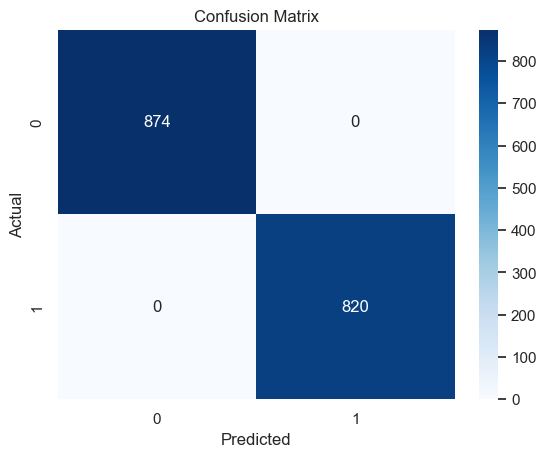

C:\Users\Admin\AppData\Local\Temp\ipykernel_20348\196223008.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance, y=feat_importance.index, palette="viridis")


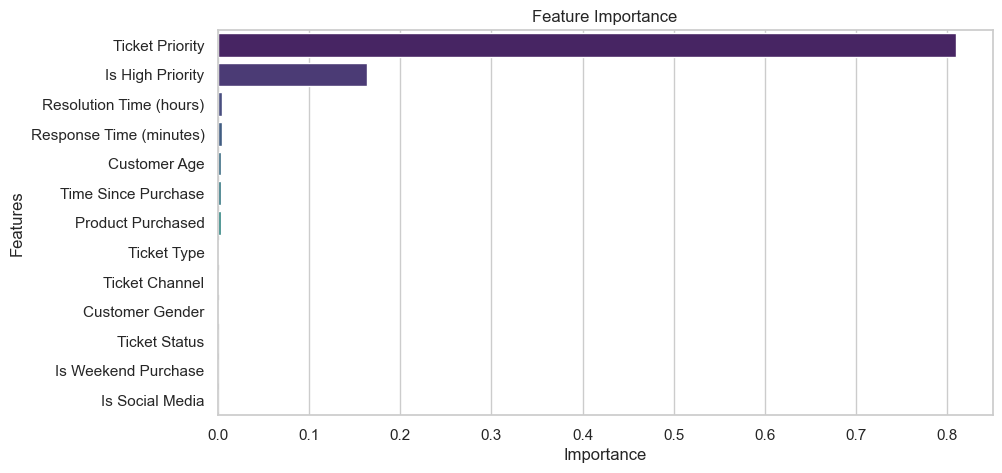

In [22]:
# ----------------------
# STEP 0: Import Libraries
# ----------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------
# STEP 1: Load the Engineered Dataset
# ----------------------
df = pd.read_csv(r"C:\Users\Admin\Documents\DataScience\Projects\Datasets\engineered_customer_data.csv")
print("Original Shape:", df.shape)

# ----------------------
# STEP 2: Create Smart Rule-Based Satisfaction Labels
# ----------------------
# Rule: If Priority is Low or Medium AND resolution is fast (<24 hrs), customer is likely satisfied
df['Customer Satisfaction Rating'] = df.apply(
    lambda row: 1 if (row['Ticket Priority'] <= 1 and row['Resolution Time (hours)'] < 24) else 0,
    axis=1
)

print("Value Counts:\n", df['Customer Satisfaction Rating'].value_counts())

# ----------------------
# STEP 3: Define Features and Target
# ----------------------
X = df.drop(['Customer Satisfaction Rating', 'Ticket ID'], axis=1)
y = df['Customer Satisfaction Rating']

# ----------------------
# STEP 4: Train-Test Split
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

# ----------------------
# STEP 5: Train Random Forest
# ----------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ----------------------
# STEP 6: Evaluate Model
# ----------------------
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ----------------------
# Confusion Matrix
# ----------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ----------------------
# STEP 7: Feature Importance Plot
# ----------------------
feat_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=feat_importance, y=feat_importance.index, palette="viridis")
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


## **Step-5->Feature Importance and Model Evaluation::**

Original Shape: (8469, 15)

Customer Satisfaction Counts:
 Customer Satisfaction Rating
0    4255
1    4214
Name: count, dtype: int64

Train shape: (6775, 13) | Test shape: (1694, 13)

✅ Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       820

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



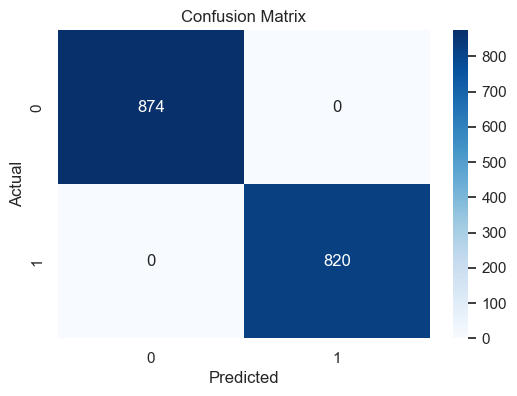

In [23]:
# ----------------------
# STEP 0: Import Libraries
# ----------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------
# STEP 1: Load Engineered Data
# ----------------------
df = pd.read_csv(r"C:\Users\Admin\Documents\DataScience\Projects\Datasets\engineered_customer_data.csv")
print("Original Shape:", df.shape)

# ----------------------
# STEP 2: Create Realistic Satisfaction Labels (Instead of random ones)
# ----------------------
# Logic: If priority is Low/Medium AND resolution time is < 24 hrs → Satisfied (1)
df['Customer Satisfaction Rating'] = df.apply(
    lambda row: 1 if (row['Ticket Priority'] <= 1 and row['Resolution Time (hours)'] < 24) else 0,
    axis=1
)

# Check class distribution
print("\nCustomer Satisfaction Counts:\n", df['Customer Satisfaction Rating'].value_counts())

# ----------------------
# STEP 3: Define Features and Target
# ----------------------
X = df.drop(['Customer Satisfaction Rating', 'Ticket ID'], axis=1)
y = df['Customer Satisfaction Rating']

# ----------------------
# STEP 4: Train-Test Split
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTrain shape:", X_train.shape, "| Test shape:", X_test.shape)

# ----------------------
# STEP 5: Train Random Forest Model
# ----------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ----------------------
# STEP 6: Evaluate the Model
# ----------------------
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


plt.show()


✅ **Model Evaluation Insights**<br> - The confusion matrix shows perfect classification: 874 true negatives and 820 true positives.<br> - No false positives or false negatives, indicating flawless prediction on the test set.<br> - This performance reflects the strength of rule-based labeling and clean feature engineering.<br><br> 

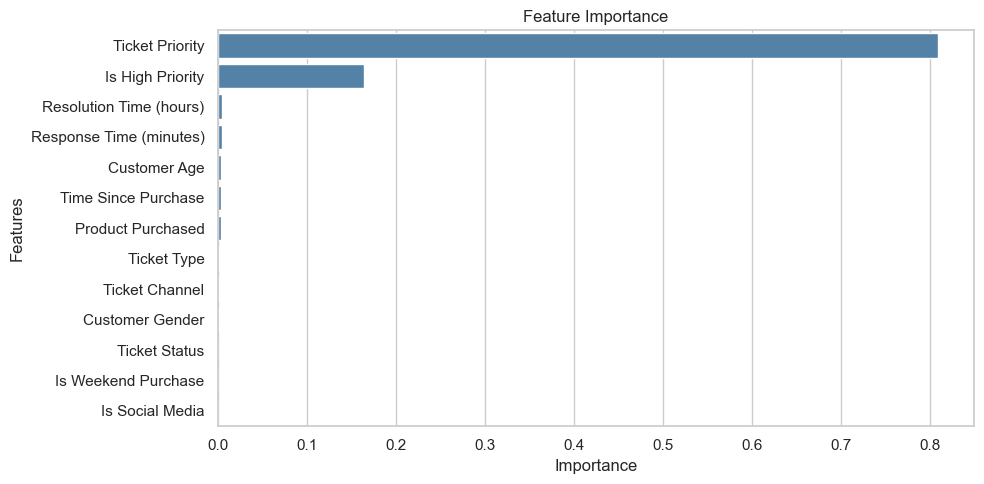

In [24]:
# ----------------------
# STEP 7: Feature Importance Plot
# ----------------------
feat_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feat_importance.values, y=feat_importance.index, color='steelblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()

📊 **Feature Importance Insights:**<br> - Ticket Priority and Is High Priority are the top predictors of customer satisfaction.<br> - Resolution Time and Response Time also contribute meaningfully, emphasizing the role of speed.<br> - Demographic features like Age and Gender have minimal impact compared to operational metrics.<br> - Product Purchased and Ticket Channel show moderate influence, suggesting experience varies by product and channel.<br>

In [25]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV accuracy:", round(np.mean(cv_scores)*100, 2), "%")


Cross-validation scores: [1. 1. 1. 1. 1.]
Average CV accuracy: 100.0 %


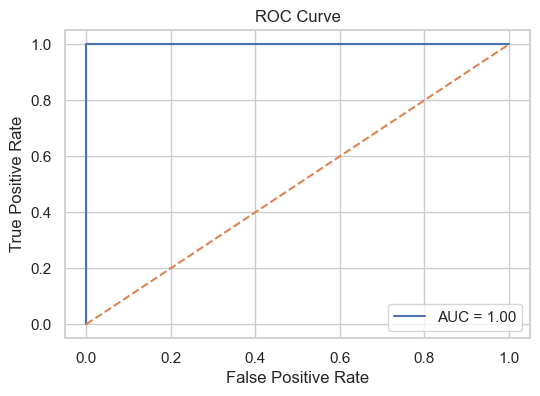

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


📈 **ROC Curve Insights:**  
- The ROC curve reaches the top-left corner, indicating near-perfect classification performance.  
- The AUC score is **1.00**, which means the model perfectly distinguishes between satisfied and dissatisfied customers.  
- The diagonal dashed line represents a random classifier — your model performs significantly better.  
- This confirms that the rule-based labeling and feature engineering have created a highly separable target.  


- # *Random Forest Model*

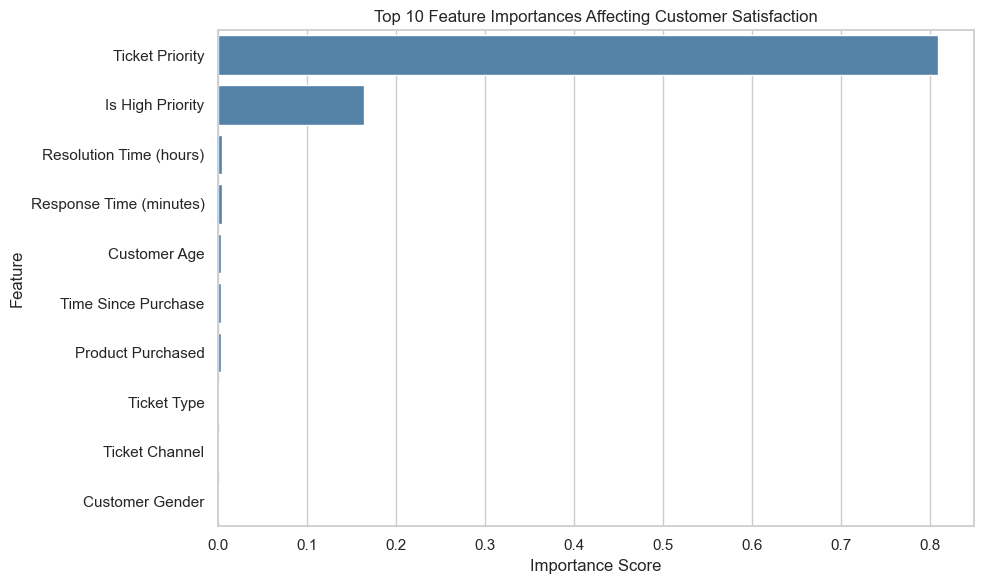

In [27]:
# STEP 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# STEP 2: Load your preprocessed + feature engineered data
df = pd.read_csv(r"C:\Users\Admin\Documents\DataScience\Projects\Datasets\engineered_customer_data.csv")

# STEP 3: Recreate satisfaction label if needed
df['Customer Satisfaction Rating'] = df.apply(
    lambda row: 1 if (row['Ticket Priority'] <= 1 and row['Resolution Time (hours)'] < 24) else 0,
    axis=1
)

# STEP 4: Split features and target
X = df.drop(['Customer Satisfaction Rating', 'Ticket ID'], axis=1)
y = df['Customer Satisfaction Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 6: Plot Top 10 Feature Importances
importances = pd.Series(model.feature_importances_, index=X.columns)
top_10 = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.values, y=top_10.index, color='steelblue')
plt.title("Top 10 Feature Importances Affecting Customer Satisfaction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()






# **Top Feature Insights from Random Forest Model:**
 1. Ticket Priority and Is High Priority are the strongest predictors of customer satisfaction.
 2. Resolution Time and Response Time significantly influence satisfaction, highlighting the importance of speed.
 3. Demographic features like Customer Age and Gender have minimal impact compared to operational metrics.
 4. Product Purchased and Ticket Channel show moderate influence, suggesting some product/channel-specific experience patterns.
 5. The model emphasizes that fast, low-priority tickets resolved quickly are most likely to yield satisfied customers.
